# Some anaytical questions that i answered:

#### Over the years no. of women setting the records grew in double digits and men dropped to 1 amd 2s

#### In DNF and CWTB disciplines women count is higher, only by amargin, but rest of the disciplines are dominated by men still

#### Russia holds the maximum no of ser records over 50 which is almost dobule by its 2nd competiter Austria

#### Very high number of records are held by women even though they started coming very late in the game but in NLT and VWT discipline men still holds most of the records

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
import datetime

In [205]:
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True)

In [ ]:
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [115]:
sns.set_theme(style="whitegrid")

## Read Data

In [54]:
#df = pd.read_csv('/kaggle/input/freediving-aida-world-records-dataset/freediving_records.csv')
df = pd.read_csv('freediving_records.csv')
categorical_columns = df.dtypes[df.dtypes == 'object'].index
numerical_columns = df.dtypes[df.dtypes != 'object'].index

In [24]:
df.head(2)

,discipline,athlete,country,record,date,event,sex
0,DYN,Panagiotakis Giorgos,GR,300,2016-07-02,Pool World Championships 2016,Men
1,DYN,Malina Mateusz,PL,300,2016-07-02,Pool World Championships 2016,Men


In [25]:
df.shape

(284, 7)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   discipline  284 non-null    object        
 1   athlete     284 non-null    object        
 2   country     284 non-null    object        
 3   record      284 non-null    object        
 4   date        284 non-null    datetime64[ns]
 5   event       284 non-null    object        
 6   sex         284 non-null    object        
dtypes: datetime64[ns](1), object(6)
memory usage: 15.7+ KB


In [27]:
df.describe().T

<ipython-input-27-ab545e235235>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe().T


,count,unique,top,freq,first,last
discipline,284,10,CWT,51,NaT,NaT
athlete,284,85,Molchanova Natalia,30,NaT,NaT
country,284,27,RU,52,NaT,NaT
record,284,153,90,8,NaT,NaT
date,284,220,2013-06-21 00:00:00,6,1993-10-07,2021-01-17
event,284,164,Vertical Blue,10,NaT,NaT
sex,284,2,Men,162,NaT,NaT


In [28]:
df.isnull().sum()

discipline    0
athlete       0
country       0
record        0
date          0
event         0
sex           0
dtype: int64

In [29]:
df.isna().sum()

discipline    0
athlete       0
country       0
record        0
date          0
event         0
sex           0
dtype: int64

In [30]:
df['sex'].value_counts()

Men      162
Women    122
Name: sex, dtype: int64

In [31]:
df['discipline'].value_counts()

CWT     51
DNF     40
DYN     39
CNF     38
FIM     37
STA     24
VWT     21
NLT     20
CWTB     9
DYNB     5
Name: discipline, dtype: int64

In [228]:
#df['country'].value_counts()

In [65]:
df[['Year','Month','Date']] = df['date'].apply(lambda x : pd.Series(str(x).split('-')))

In [67]:
df.drop('date', inplace=True, axis =1)

In [68]:
df.head()

,discipline,athlete,country,record,event,sex,Year,Month,Date
0,DYN,Panagiotakis Giorgos,GR,300,Pool World Championships 2016,Men,2016,07,02
1,DYN,Malina Mateusz,PL,300,Pool World Championships 2016,Men,2016,07,02
2,DYN,Malina Mateusz,PL,285,The XIII Polish Feediving Pool Championships,Men,2015,12,11
3,DYN,Colak Goran,HR,281,Individual AIDA pool World Championships,Men,2013,06,21
4,DYN,Colak Goran,HR,273,World Championship AIDA 2011 Indoor Event,Men,2011,10,07


## EDA

In [104]:
y_data_sex= df.groupby(by=['Year', 'sex'])['discipline'].count()
y_data_sex  =pd.DataFrame(y_data_sex)

[Text(0.5, 1.0, 'Count of Men and Women setting record each year'),
 Text(0.5, 0, 'Count')]

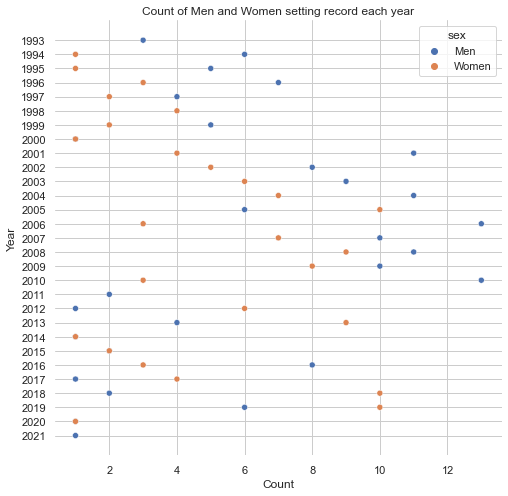

In [133]:
f, ax = plt.subplots(figsize=(8,8))
sns.despine(f, left=True, bottom=True)

sns.scatterplot(y='Year',x= 'discipline',
                data=y_data_sex,ax=ax,
                hue = 'sex'
               )
ax.set(title="Count of Men and Women setting record each year", xlabel= 'Count')

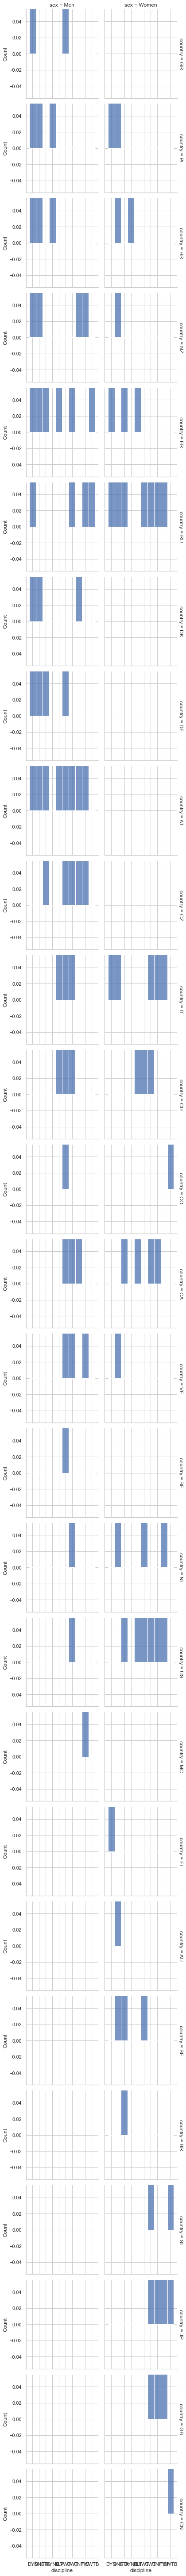

In [121]:
# sns.displot(
#     df, x="discipline", col="sex", row="country",
#     binwidth=3, height=3, facet_kws=dict(margin_titles=True),
# )

[Text(0.5, 1.0, 'Count of Men and Women in different disciplines')]

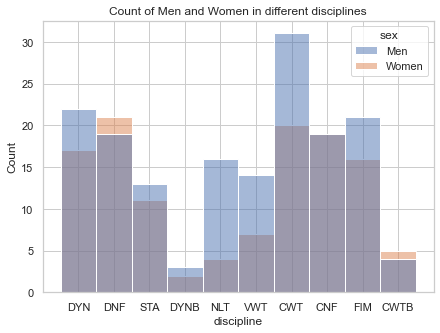

In [127]:
f, ax = plt.subplots(figsize=(7, 5))
sns.histplot(
    df,
    x="discipline", hue="sex"
)
ax.set(title="Count of Men and Women in different disciplines")

#### Athelete from each discipline who held maximum no of records

In [226]:
df.groupby('discipline')[['athlete','sex']].max()

,athlete,sex
discipline,,
CNF,Zecchini Alessia,Women
CWT,Zecchini Alessia,Women
CWTB,Wenjie Lu Jessea,Women
DNF,Zubcic Katarina,Women
DYN,Solich-Talanda Magdalena,Women
DYNB,Milosic Boris,Women
FIM,Zecchini Alessia,Women
NLT,Streeter Tanya,Women
STA,Stepanek Martin,Women


Interesting as all of them are women

#### No of atheletes from each country who set the records over the years

<AxesSubplot:xlabel='country'>

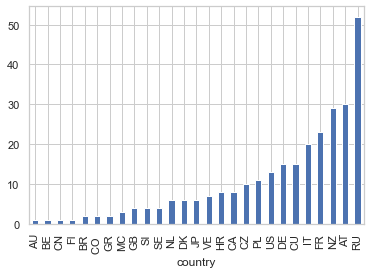

In [194]:
df.groupby('country')['athlete'].count().sort_values().plot(kind='bar')

In [185]:
# g = sns.catplot(
#     data=y_data_record, kind="bar",
#     x="", y="record"
# )

# f, ax = plt.subplots(figsize=(8,8))
# sns.despine(f, left=True, bottom=True)

# sns.scatterplot(x='record',y= 'discipline',
#                 data=y_data_sex,ax=ax,
#                 hue = 'sex'
#                )

# Work in progress